In [18]:
import torch
import torch.nn.functional as F

In [16]:
n, n_h, n_w = 2, 25, 18
full_h, full_w = 3360, 2560
config = {
    'STRIDE': 120,
    'IMG_SIZE': 480
}
device = torch.device('cuda:2')
dtype = torch.float

In [3]:
x = torch.randn(n, n_h + 1, n_w + 1, 480, 480, device=device, dtype=dtype)
y = torch.randn(n, full_h, full_w, device=device, dtype=dtype)

w = torch.randn(480, 480, device=device, dtype=dtype, requires_grad=True)
b = torch.randn(480, 480, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(50):
    vals = torch.zeros(2, full_h, full_w, device=device, dtype=dtype, requires_grad=False)
    counts = torch.zeros(2, full_h, full_w, device=device, dtype=dtype, requires_grad=False)
    
    for hh in range(n_h):
        for ww in range(n_w):
            h_start = hh*config['STRIDE']
            h_end = hh*config['STRIDE'] + config['IMG_SIZE']
            w_start = ww*config['STRIDE']
            w_end = ww*config['STRIDE'] + config['IMG_SIZE']
            vals[:, h_start:h_end, w_start:w_end] += x[:, hh, ww] * w[None,:] + b
            counts[:, h_start:h_end, w_start:w_end] += w[None,:]
            
    for hh in range(n_h):
        h_start = hh*config['STRIDE']
        h_end = hh*config['STRIDE'] + config['IMG_SIZE']
        vals[:, h_start:h_end, -config['IMG_SIZE']:] += x[:, hh, n_w] * w[None,:] + b
        counts[:, h_start:h_end, -config['IMG_SIZE']:] += w[None,:]

    for ww in range(n_w):
        w_start = ww*config['STRIDE']
        w_end = ww*config['STRIDE'] + config['IMG_SIZE']
        vals[:, -config['IMG_SIZE']:, w_start:w_end] += x[:, n_h, ww] * w[None,:] + b
        counts[:, -config['IMG_SIZE']:, w_start:w_end] += w[None,:]

    vals[:, -config['IMG_SIZE']:, -config['IMG_SIZE']:] += x[:, n_h, n_w] * w[None,:] + b
    counts[:, -config['IMG_SIZE']:, -config['IMG_SIZE']:] += w[None,:]

    y_pred = vals / counts

    loss = (y_pred - y).pow(2).sum()
    if t % 5 == 0:
        print(t, loss.item())
    loss.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        w.grad.zero_()
        b.grad.zero_()

0 28373160034304.0
5 6519668224.0
10 54268224.0
15 51585752.0


KeyboardInterrupt: 

In [8]:
w.detach().cpu().numpy().shape

(480, 480)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
w = np.load('learnt_weight.npz')['w']

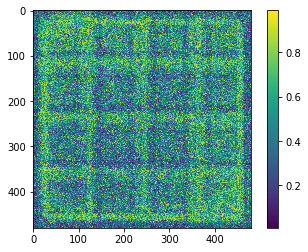

In [33]:
x = w
# x[x>2] = 2
# x[x<0] = 0
plt.imshow(x)
plt.colorbar()

In [17]:
w = torch.randn(480, 480, device=device, dtype=dtype, requires_grad=True)

In [21]:
torch.nn.Sigmoid()(w).size()

torch.Size([480, 480])